# Proyecto Integrador

## Score de Riesgo en Originación de Crédito
## Para Kubo Financiero

Participantes:

Dalina Aideé Villa Ocelotl (A01793258)

Julián Valera Juarez (A01793875)

Miguel Guillermo Galindo Orozco (A01793695)
1793695)

## Avance 3. Baseline

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# Leer archivo Excel
file_path = 'base_20210101a20240430 (2).xlsx'
df = pd.read_excel(file_path, sheet_name='Cliientes_Nuevos')

In [47]:
# Seleccionar las características y la variable objetivo
X = df.drop('es_malo_actual', axis=1)
y = df['es_malo_actual']


In [48]:
# Rellenar valores nulos en columnas numéricas con la mediana
numeric_columns = X.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    median_value = X[col].median()
    X[col] = X[col].fillna(median_value)

In [49]:
# Eliminar columnas tipo datetime
X = X.select_dtypes(exclude=['datetime64'])

In [50]:
# Convertir características categóricas a variables dummy
X = pd.get_dummies(X, drop_first=True)

In [51]:
# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [52]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [53]:
# Entrenar el modelo de regresión logística como baseline
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [54]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [55]:
# Calcular la precisión del modelo (Baseline)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo (Baseline):", accuracy)

Precisión del modelo (Baseline): 0.9431818181818182


In [56]:
# Crear Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

Matriz de Confusión:
[[5617   21]
 [ 379 1023]]


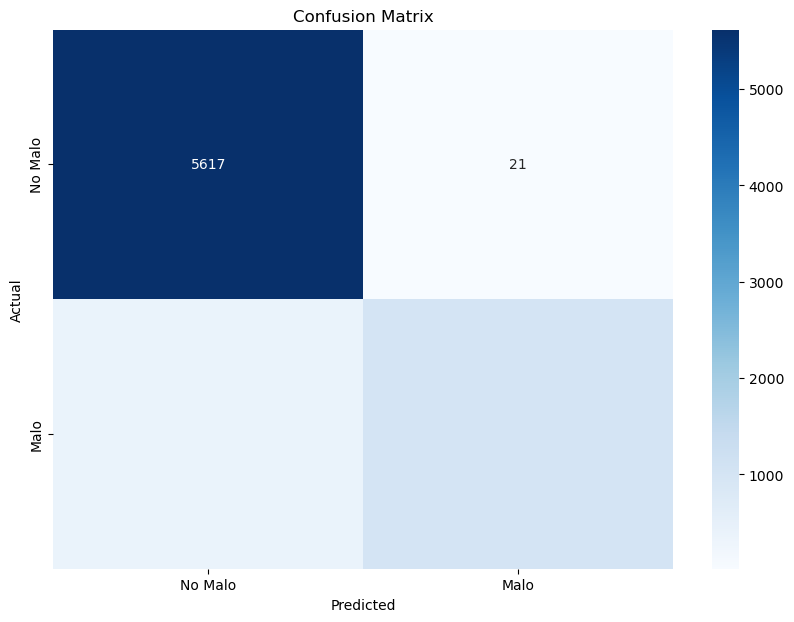

In [57]:
# Grafica de Matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Malo', 'Malo'], yticklabels=['No Malo', 'Malo'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [58]:
# Informe de clasificación
class_report = classification_report(y_test, y_pred)
print("Informe de Clasificación:")
print(class_report)

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5638
           1       0.98      0.73      0.84      1402

    accuracy                           0.94      7040
   macro avg       0.96      0.86      0.90      7040
weighted avg       0.95      0.94      0.94      7040



In [59]:
# Identificar características importantes utilizando coeficientes de regresión logística
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
print('Importancia de las características:')
pd.set_option('display.max_rows', None)
print(feature_importance)

Importancia de las características:
                                           Feature  Coefficient
0                                    prospectus_id    -0.476075
1                                             Edad    -0.107702
2                             NumCaracteresSobreMi    -0.047896
3                                        cci_score    -0.115357
4                                         bc_score    -0.261510
5                                      NumCredHist    -1.199730
6                                    MontoCredHist    -0.026729
7                                    CredMobMayor2    -0.028172
8                                   NumCredActivos     0.228527
9                                 MontoCredActivos    -0.218138
10                                        NumCredR    -0.104592
11                                      MontoCredR     0.027143
12                                        NumCredI     1.088303
13                                      MontoCredI     0.046397
14  

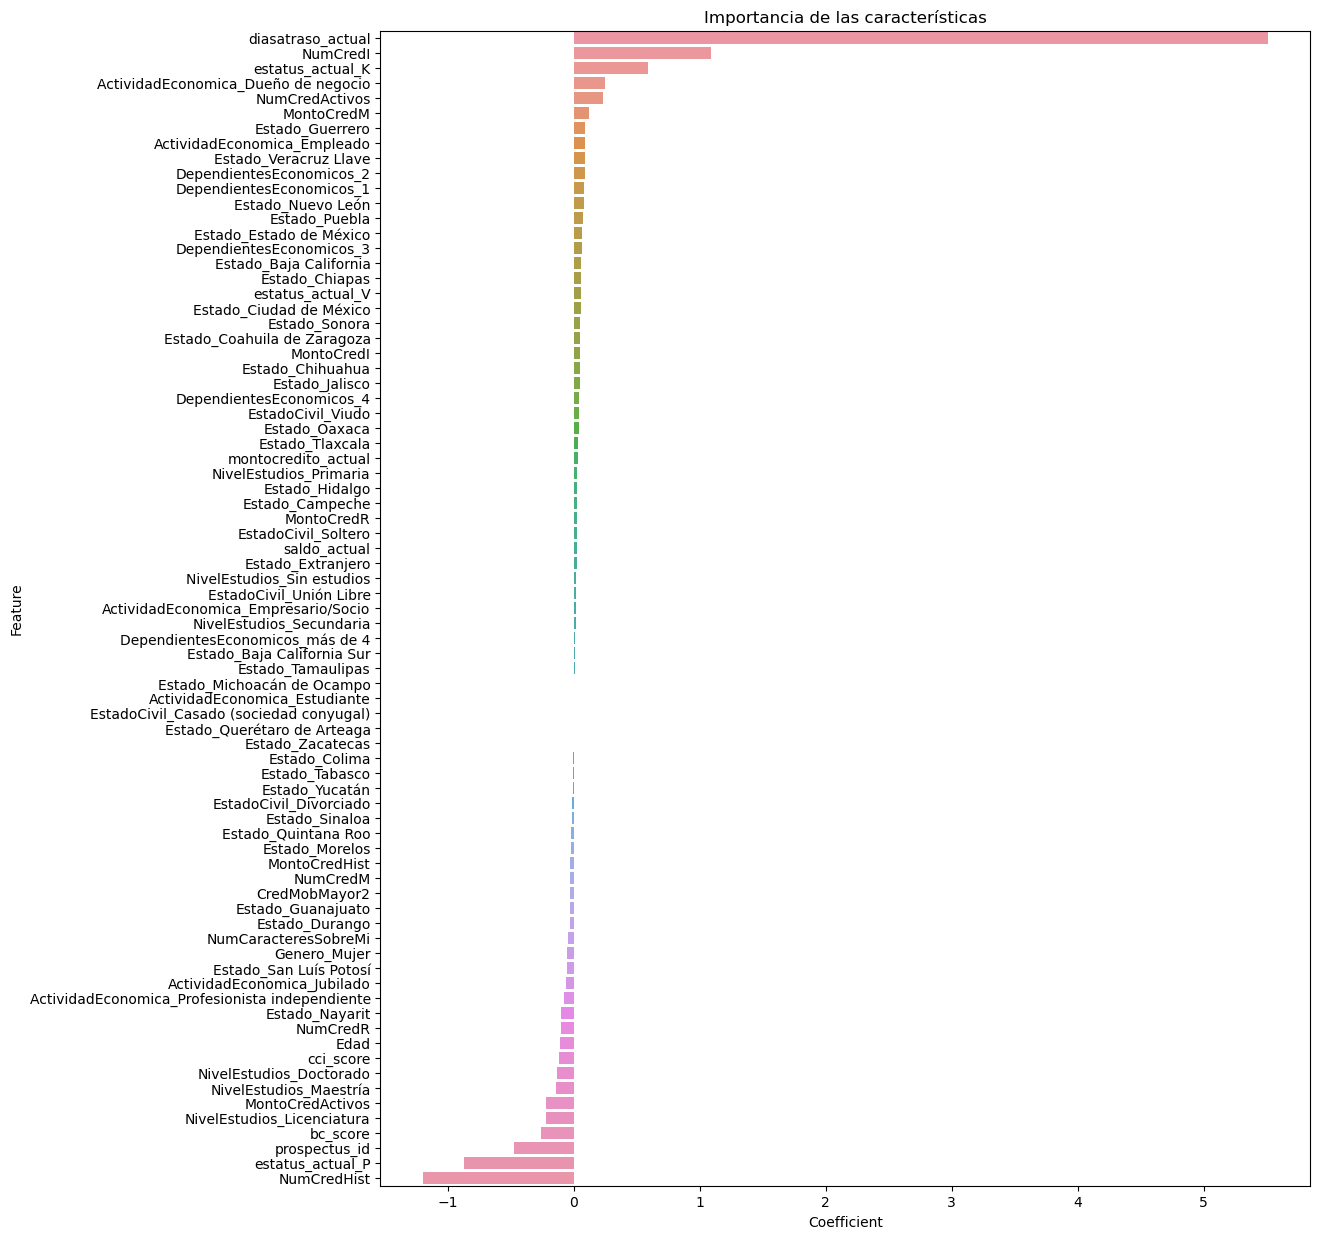

In [60]:
# Grafica de la importancia de las características
plt.figure(figsize=(12, 15))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance.sort_values(by='Coefficient', ascending=False))
plt.title('Importancia de las características')
plt.show()

In [61]:
# Evaluar sobreajuste del modelo
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("Precisión del conjunto de entrenamiento:", train_score)
print("Precisión del conjunto de prueba:", test_score)

Precisión del conjunto de entrenamiento: 0.9431047341691231
Precisión del conjunto de prueba: 0.9431818181818182


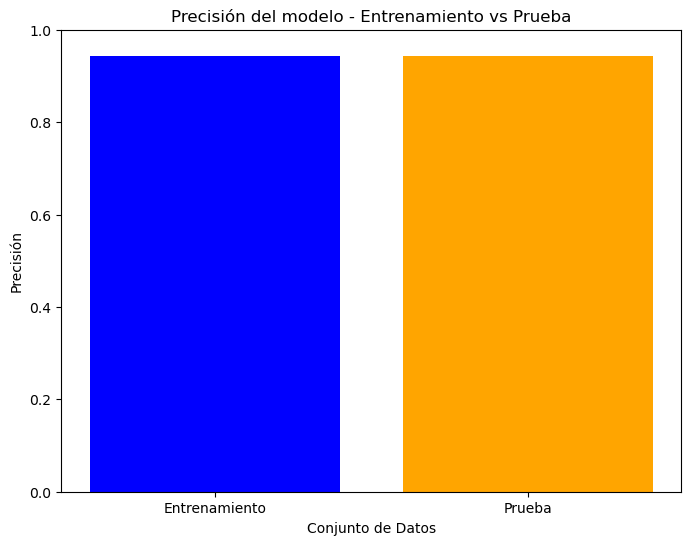

In [66]:
import matplotlib.pyplot as plt

# Definir métricas a graficar
metrics = ['Entrenamiento', 'Prueba']
accuracy_scores = [train_score, test_score]

# Graficar las métricas
plt.figure(figsize=(8, 6))
plt.bar(metrics, accuracy_scores, color=['blue', 'orange'])
plt.title('Precisión del modelo - Entrenamiento vs Prueba')
plt.xlabel('Conjunto de Datos')
plt.ylabel('Precisión')
plt.ylim(0, 1)
plt.show()


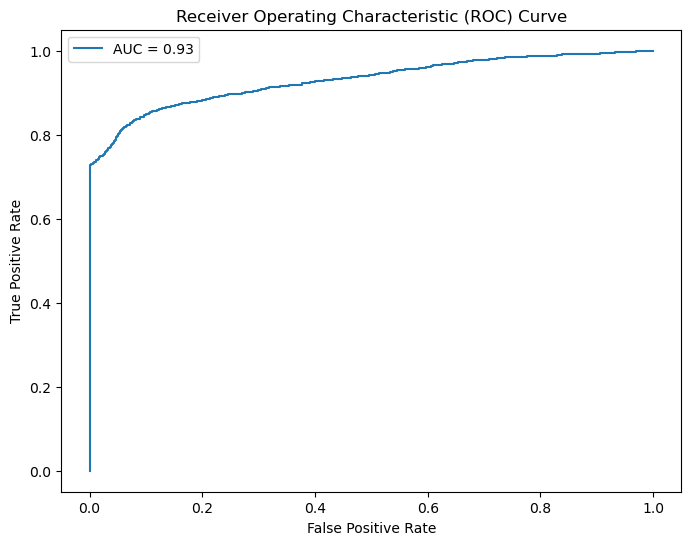

In [62]:
# Calcular la curva ROC y AUC-ROC
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [63]:
# Establecer el desempeño mínimo a obtener
min_accuracy = 0.92
min_auc_roc = 0.90
min_recall = 0.70
min_precision = 0.95
min_f1_score = 0.80
min_specificity = 0.95

# Calcular otras métricas para comparar con el desempeño mínimo
report = classification_report(y_test, y_pred, output_dict=True)
recall = report['1']['recall']
precision = report['1']['precision']
f1_score = report['1']['f1-score']
specificity = report['0']['recall']  # Specificity is the recall of the negative class

# Mostrar las métricas calculadas
print(f'Desempeño mínimo requerido - Accuracy: {min_accuracy}, AUC-ROC: {min_auc_roc}')
print(f'Desempeño del modelo:\n   Accuracy: {accuracy},\n    AUC-ROC: {auc_score},\n     Recall: {recall}, \n  Precision: {precision}, \n   F1-Score: {f1_score},\nSpecificity: {specificity}')

# Verificar si el modelo cumple con los requisitos mínimos
if (accuracy >= min_accuracy and auc_score >= min_auc_roc and
    recall >= min_recall and precision >= min_precision and
    f1_score >= min_f1_score and specificity >= min_specificity):
    print("\nEl modelo cumple con el desempeño mínimo requerido.")
else:
    print("\nEl modelo no cumple con el desempeño mínimo requerido.")

Desempeño mínimo requerido - Accuracy: 0.92, AUC-ROC: 0.9
Desempeño del modelo:
   Accuracy: 0.9431818181818182,
    AUC-ROC: 0.9300211677535614,
     Recall: 0.7296718972895863, 
  Precision: 0.9798850574712644, 
   F1-Score: 0.8364677023712183,
Specificity: 0.9962752749201844

El modelo cumple con el desempeño mínimo requerido.


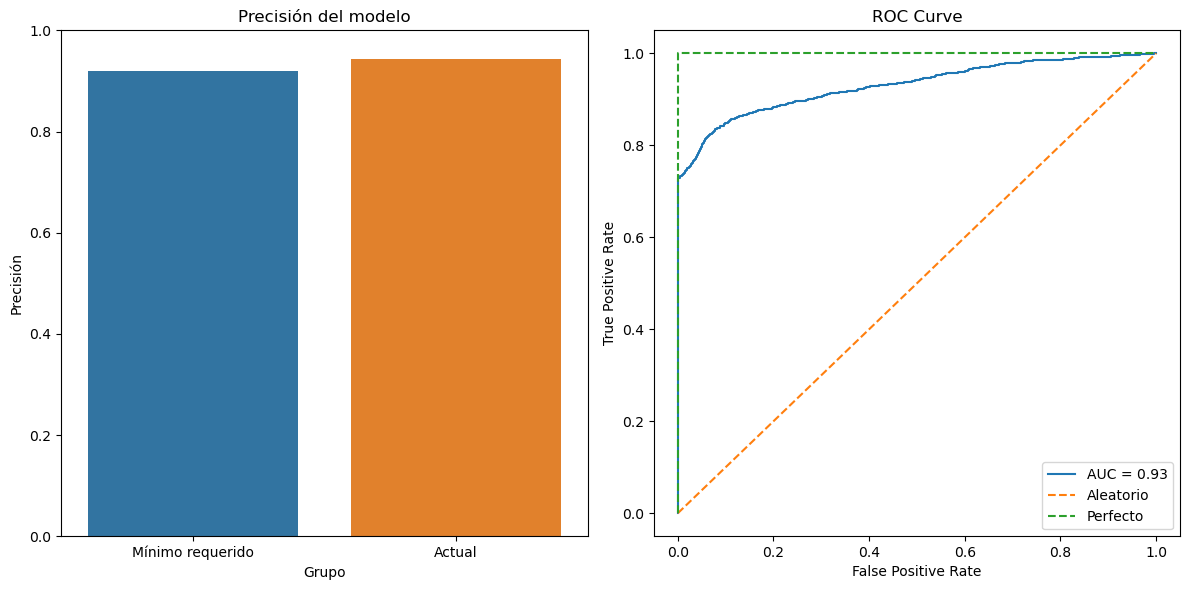

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame con los datos de precisión mínima y precisión actual
data = {'Grupo': ['Mínimo requerido', 'Actual'],
        'Precisión': [min_accuracy, accuracy]}
df = pd.DataFrame(data)

# Graficar usando Seaborn
plt.figure(figsize=(12, 6))

# Gráfico de precisión
plt.subplot(1, 2, 1)
sns.barplot(x='Grupo', y='Precisión', data=df)
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.ylim(0, 1)

# Gráfico de AUC-ROC
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', label='Aleatorio')
plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', label='Perfecto')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.tight_layout()
plt.show()


## ¿Qué algoritmo se puede utilizar como baseline para predecir las variables objetivo?
### El algoritmo utilizado como baseline para predecir las variables es el de Regresión Logística.
### La regresión logística es una opción apropiada para el Score de Riesgo en Originación de Crédito debido a su capacidad para proporcionar interpretación, manejar problemas binarios, eficiencia computacional y capacidad predictiva adecuada.

## ¿Se puede determinar la importancia de las características para el modelo generado?
### Sí, se puede determinar la importancia de las características utilizando los coeficientes del modelo de regresión logística. En el archivo se muestra cómo se crean las tablas con las características y sus coeficientes, lo que permite identificar cuáles son las más importantes​​.

## ¿El modelo está sub/sobreajustando los datos de entrenamiento?
### El modelo no está ni sobreajustando ni subajustando los datos de entrenamiento. Esto se debe a que las precisiones del conjunto de entrenamiento y del conjunto de prueba son muy similares. Una pequeña diferencia indica que el modelo tiene un buen equilibrio y generaliza bien en los datos de prueba, lo que sugiere un buen desempeño sin problemas significativos de sobreajuste o subajuste.

## ¿Cuál es la métrica adecuada para este problema de negocio?
### La métrica utilizada en el archivo para evaluar el modelo es la precisión (accuracy). Sin embargo, la métrica adecuada puede depender del contexto específico del negocio y del balance de clases en el conjunto de datos. En muchos problemas de clasificación, además de la precisión, se pueden considerar otras métricas como el F1-score, la precisión, y el recall, especialmente si las clases están desbalanceadas​​.

## ¿Cuál debería ser el desempeño mínimo a obtener?
### Con base a los requisitos de negocio, se proponen el siguiente minimo desempeño:
### Accuracy: 0.92
### AUC-ROC: 0.90
### Recall: 0.70
### Precision: 0.95
### F1-Score: 0.80
### Specificity: 0.95

## El resultado final fue:
### El modelo cumple con el desempeño mínimo requerido.

